In [ ]:
import pandas as pd
import plotly.express as px

In [ ]:
import numpy as np

In [ ]:
from datetime import datetime

In [ ]:
import geopandas

In [ ]:
import folium

In [ ]:
parking_data=pd.read_csv("/content/merged_parking.csv")

In [ ]:
parking_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35477 entries, 0 to 35476
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      35477 non-null  int64  
 1   Block           35477 non-null  int64  
 2   Street          35477 non-null  object 
 3   EntryDate       35477 non-null  object 
 4   Bylaw           35477 non-null  int64  
 5   Section         35477 non-null  object 
 6   Status          35477 non-null  object 
 7   InfractionText  35477 non-null  object 
 8   Year            35477 non-null  float64
 9   HBLOCK          35477 non-null  object 
 10  STREETUSE       35477 non-null  object 
 11  coord_1         35477 non-null  object 
 12  coord_2         35477 non-null  object 
dtypes: float64(1), int64(3), object(9)
memory usage: 3.5+ MB


In [ ]:
parking_data.head()

,Unnamed: 0,Block,Street,EntryDate,Bylaw,Section,Status,InfractionText,Year,HBLOCK,STREETUSE,coord_1,coord_2
0,0,1400,Kingsway,2017-08-23,2849,17.1,IS,STOP AT A PLACE WHERE A TRAFFIC SIGN PROHIBITS...,2017.0,1400 KINGSWAY,Arterial,"[-123.07609868345955, 49.250113144142205]","[-123.07335078330377, 49.248972158836736]"
1,1,1400,KINGSWAY,2018-07-25,2849,17.1,IS,STOP AT A PLACE WHERE A TRAFFIC SIGN PROHIBITS...,2018.0,1400 KINGSWAY,Arterial,"[-123.07609868345955, 49.250113144142205]","[-123.07335078330377, 49.248972158836736]"
2,2,1400,KINGSWAY,2019-07-03,2849,19.1(G),VA,STOP ON A LANE WITHIN AN AREA 1.5M FROM EITHER...,2019.0,1400 KINGSWAY,Arterial,"[-123.07609868345955, 49.250113144142205]","[-123.07335078330377, 49.248972158836736]"
3,3,1400,KINGSWAY,2018-01-08,2849,17.1,IS,STOP AT A PLACE WHERE A TRAFFIC SIGN PROHIBITS...,2018.0,1400 KINGSWAY,Arterial,"[-123.07609868345955, 49.250113144142205]","[-123.07335078330377, 49.248972158836736]"
4,4,1400,KINGSWAY,2018-01-04,2849,17.1,IS,STOP AT A PLACE WHERE A TRAFFIC SIGN PROHIBITS...,2018.0,1400 KINGSWAY,Arterial,"[-123.07609868345955, 49.250113144142205]","[-123.07335078330377, 49.248972158836736]"


In [ ]:
parking_data["lat_1"]=parking_data["coord_1"].apply(lambda x:x.strip('[').strip(']').split(',')[0])

In [ ]:
parking_data["long_1"]=parking_data["coord_1"].apply(lambda x:x.strip('[').strip(']').split(',')[1])

In [ ]:
parking_data["lat_2"]=parking_data["coord_2"].apply(lambda x:x.strip('[').strip(']').split(',')[0])

In [ ]:
parking_data["long_2"]=parking_data["coord_2"].apply(lambda x:x.strip('[').strip(']').split(',')[1])

0        -123.07609868345955
1        -123.07609868345955
2        -123.07609868345955
3        -123.07609868345955
4        -123.07609868345955
                ...         
35472     -123.0736581971123
35473     -123.0736493320857
35474    -123.07365534541275
35475    -123.06959051142432
35476    -123.06957471683789
Name: lat_1, Length: 35477, dtype: object

In [ ]:
geo_cols=[col for col in parking_data.columns if "lat" in col or "long" in col]

In [ ]:
for col in geo_cols:
  parking_data[col]=parking_data[col].astype(float)

In [ ]:
agg_dataset_status=parking_data.groupby(by='Status').count()

In [ ]:
agg_dataset_status

,Unnamed: 0,Block,Street,EntryDate,Bylaw,Section,InfractionText,Year,HBLOCK,STREETUSE,coord_1,coord_2
Status,,,,,,,,,,,,
IS,32428,32428,32428,32428,32428,32428,32428,32428,32428,32428,32428,32428
RA,7,7,7,7,7,7,7,7,7,7,7,7
VA,2367,2367,2367,2367,2367,2367,2367,2367,2367,2367,2367,2367
VS,95,95,95,95,95,95,95,95,95,95,95,95
WR,580,580,580,580,580,580,580,580,580,580,580,580


In [ ]:
fig = px.bar(x=agg_dataset_status.index,y=agg_dataset.iloc[:,0],text=agg_dataset_status.iloc[:,0],title='Count of Infractions by Status')
fig.show()

In [ ]:
datetime.strptime(parking_data.loc[0,"EntryDate"], '%Y-%m-%d')

datetime.datetime(2017, 8, 23, 0, 0)

In [ ]:
parking_data["EntryDate"]=parking_data["EntryDate"].apply(lambda x:datetime.strptime(x,'%Y-%m-%d'))

In [ ]:
parking_data["EntryDate"]

0       2017-08-23
1       2018-07-25
2       2019-07-03
3       2018-01-08
4       2018-01-04
           ...    
35472   2019-12-12
35473   2019-12-12
35474   2019-12-12
35475   2019-12-12
35476   2019-12-12
Name: EntryDate, Length: 35477, dtype: datetime64[ns]

In [ ]:
parking_data["Month"]=parking_data["EntryDate"].apply(lambda x:x.month)

In [ ]:
parking_data["EntryDate"].dt.to_period('M').iloc[0]

Period('2017-08', 'M')

In [ ]:
agg_data_month_every_year=parking_data.groupby(by=parking_data["EntryDate"].dt.to_period('M')).count()

In [ ]:
fig = px.line(x=agg_data_month_every_year.index.astype('datetime64[ns]'),
              y=agg_data_month_every_year.iloc[:,0],title='Count of Infractions by Month each year')                  #,range_x=['2017-01-01','2019-12-1'])
fig.update_xaxes(rangeslider_visible=True)
fig.show()

The top anomaly detected on Oct 8, 2019 was:

Total count of Infractionts is 487, which was higher than the expected 105

In [ ]:
agg_date_street_use=parking_data.groupby(by='STREETUSE').count()

In [ ]:
agg_date_street_use

,Unnamed: 0,Block,Street,EntryDate,Bylaw,Section,Status,InfractionText,Year,HBLOCK,coord_1,coord_2,Month
STREETUSE,,,,,,,,,,,,,
Arterial,21888,21888,21888,21888,21888,21888,21888,21888,21888,21888,21888,21888,21888
Collector,59,59,59,59,59,59,59,59,59,59,59,59,59
Residential,12771,12771,12771,12771,12771,12771,12771,12771,12771,12771,12771,12771,12771
Secondary Arterial,759,759,759,759,759,759,759,759,759,759,759,759,759


In [ ]:
fig = px.bar(x=agg_date_street_use.index,
             y=agg_date_street_use.iloc[:,0],title='Count of Infractions by Street Use',
             text=agg_date_street_use.iloc[:,0])
fig.show()

In [ ]:
agg_data_street=parking_data.groupby(by="Street").count()

In [ ]:
top_20_streets=agg_data_street.apply(lambda x: x.sort_values(ascending=False)).head(20)

Top 20 Streets with the highest number of parking infractions

In [ ]:
top_20_streets=list(top_20_streets.index)

['W BROADWAY',
 'ROBSON ST',
 'RICHARDS ST',
 'HOMER ST',
 'SEYMOUR ST',
 'HAMILTON ST',
 'HOWE ST',
 'W CORDOVA ST',
 'CAMBIE ST',
 'ABBOTT ST',
 'MAIN ST',
 'BURRARD ST',
 'KINGSWAY',
 'ALBERNI ST',
 'THURLOW ST',
 'Robson St.',
 'DAVIE ST',
 'Homer St.',
 'COLUMBIA ST',
 'W PENDER ST']

In [ ]:
geo_df_1=geopandas.GeoDataFrame(parking_data.loc[:,["Street","lat_1","long_1"]]\
                                                 ,geometry=geopandas.points_from_xy(parking_data.lat_1,parking_data.long_1))

In [ ]:
geo_df_2=geopandas.GeoDataFrame(parking_data.loc[:,["Street","lat_2","long_2"]]\
                                                 ,geometry=geopandas.points_from_xy(parking_data.lat_2,parking_data.long_2))

In [ ]:
geo_df_1

,Street,lat_1,long_1,geometry
0,Kingsway,-123.076099,49.250113,POINT (-123.07610 49.25011)
1,KINGSWAY,-123.076099,49.250113,POINT (-123.07610 49.25011)
2,KINGSWAY,-123.076099,49.250113,POINT (-123.07610 49.25011)
3,KINGSWAY,-123.076099,49.250113,POINT (-123.07610 49.25011)
4,KINGSWAY,-123.076099,49.250113,POINT (-123.07610 49.25011)
...,...,...,...,...
35472,WOODLAND DRIVE,-123.073658,49.260948,POINT (-123.07366 49.26095)
35473,WOODLAND DRIVE,-123.073649,49.261401,POINT (-123.07365 49.26140)
35474,WOODLAND DRIVE,-123.073655,49.261082,POINT (-123.07366 49.26108)
35475,COMMERCIAL DRIVE,-123.069591,49.271412,POINT (-123.06959 49.27141)


In [ ]:
geo_df_1_filt=geo_df_1[geo_df_1["Street"].isin(list(top_20_streets.index))]

In [ ]:

geo_df_1_filt=geo_df_1_filt.drop_duplicates("Street",keep='last')

In [ ]:
geo_df_list = [[point.xy[1][0], point.xy[0][0]] for point in geo_df_1_filt.geometry ]

In [ ]:
geo_unique_lis=[list(x) for x in set(tuple(x) for x in geo_df_list)]

In [ ]:
geo_unique_lis

[[49.28109785153686, -123.11250751202398],
 [49.274196273341474, -123.12486044367441],
 [49.273734703205385, -123.12747999381172],
 [49.28199625335289, -123.12080340829894],
 [49.2833918793573, -123.10659026549541],
 [49.28793340051277, -123.11978378180704],
 [49.28531489100729, -123.11189381672449],
 [49.27657602283303, -123.12902759891873],
 [49.26504404011783, -123.14570864426071],
 [49.27545341436151, -123.12680124793647],
 [49.29319891816215, -123.13594497024789],
 [49.28107819201969, -123.10757271128858],
 [49.248896616065345, -123.11004822417173],
 [49.237602592017225, -123.04884462165495],
 [49.21905362666441, -123.11677104318774],
 [49.2117632913364, -123.10216458130378],
 [49.26436426258648, -123.18585678274802],
 [49.27779206826449, -123.12719015447645]]

In [ ]:
i=0
Map=folium.Map(location=[49.26107966824709, -123.09776706798105],tiles='OpenStreetMap', zoom_start = 12)
for coordinates in geo_unique_lis:
  Map.add_child(folium.Marker(location = coordinates,popup="Street: "+ str(geo_df_1_filt["Street"].iloc[i])))
  i+=1


In [ ]:
Map

In [ ]:
geo_df_2_filt=geo_df_2[geo_df_2["Street"].isin(list(top_20_streets.index))]

In [ ]:
geo_df_2_filt=geo_df_2_filt.drop_duplicates("Street",keep='last')

In [ ]:
geo_df_2_list = [[point.xy[1][0], point.xy[0][0]] for point in geo_df_2_filt.geometry ]

In [ ]:
geo_unique_2_lis=[list(x) for x in set(tuple(x) for x in geo_df_2_list)]

In [ ]:
i=0
Map=folium.Map(location=[49.26107966824709, -123.09776706798105],tiles='OpenStreetMap', zoom_start = 12)
for coordinates in geo_unique_2_lis:
  Map.add_child(folium.Marker(location = coordinates,popup="Street: "+ str(geo_df_2_filt["Street"].iloc[i])))
  i+=1


In [ ]:
Map

In [ ]:
selected_variables = ["Street", "coord_1", "coord_2", "STREETUSE", "Status"]
df = parking_data[selected_variables].copy()
df.head()

,Street,coord_1,coord_2,STREETUSE,Status
0,Kingsway,"[-123.07609868345955, 49.250113144142205]","[-123.07335078330377, 49.248972158836736]",Arterial,IS
1,KINGSWAY,"[-123.07609868345955, 49.250113144142205]","[-123.07335078330377, 49.248972158836736]",Arterial,IS
2,KINGSWAY,"[-123.07609868345955, 49.250113144142205]","[-123.07335078330377, 49.248972158836736]",Arterial,VA
3,KINGSWAY,"[-123.07609868345955, 49.250113144142205]","[-123.07335078330377, 49.248972158836736]",Arterial,IS
4,KINGSWAY,"[-123.07609868345955, 49.250113144142205]","[-123.07335078330377, 49.248972158836736]",Arterial,IS


Removing the observations with the RA status as there are only 7 in number !

In [ ]:
df=df[df['Status']!='RA']

In [ ]:
# Encoding of the categorical variables
# https://www.hackdeploy.com/python-one-hot-encoding-with-scikit-learn/
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

from sklearn.preprocessing import LabelEncoder
le_street = LabelEncoder()
le_streetuse = LabelEncoder()
le_entrydate = LabelEncoder()
le_coord_1 = LabelEncoder()
le_coord_2 = LabelEncoder()
le_status = LabelEncoder()

df['Street'] = le_street.fit_transform(df.Street)
df['STREETUSE'] = le_streetuse.fit_transform(df.STREETUSE)

df['coord_1'] = le_coord_1.fit_transform(df.coord_1)
df['coord_2'] = le_coord_2.fit_transform(df.coord_2)
df['Status'] = le_status.fit_transform(df.Status)

df.head()

,Street,coord_1,coord_2,STREETUSE,Status
0,246,903,888,0,0
1,238,903,888,0,0
2,238,903,888,0,1
3,238,903,888,0,0
4,238,903,888,0,0


In [ ]:
#IS(CATEGORY 0) : 32428
#VA(CATEGORY 1) : 2367
#WR(CATEGORY 3) : 580
#VS(CATEGORY 2) : 95
df.Status.value_counts()


0    32428
1     2367
3      580
2       95
Name: Status, dtype: int64

In [ ]:
from collections import Counter
Counter(df.Status.values)

Counter({0: 32428, 1: 2367, 2: 95, 3: 580})

In [ ]:
# Separate into variables and target variable
X=df.iloc[:,0:3].values
y=df.iloc[:,4].values

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [ ]:

over = SMOTE(sampling_strategy={0: 32428, 1: 30000, 2: 20000, 3:30000})
# transform the dataset
X, y = over.fit_resample(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, stratify=y)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification


X_train, y_train = make_classification(n_samples=1000, n_features=3, n_informative=2, n_redundant=0, random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

 
*  Our model gives a weighted precision of about 0.80 considering all the classes which means the true positive rate or the  correctly identified occurences of  infractions of each class is 80%  

* The weighted recall of about 0.27 which means 27% of true positives correctly identified in a collection of true positives and false negatives

* The weighted f1-score is 0.11 which is simply the harmonic mean of the above two measures






In [ ]:
from sklearn.metrics import classification_report
y_pred = clf.predict(X_test)
print(classification_report(y_test,y_pred,zero_division=1))

              precision    recall  f1-score   support

           0       1.00      0.00      0.00      8107
           1       0.27      1.00      0.42      7500
           2       1.00      0.00      0.00      5000
           3       1.00      0.00      0.00      7500

    accuracy                           0.27     28107
   macro avg       0.82      0.25      0.11     28107
weighted avg       0.80      0.27      0.11     28107



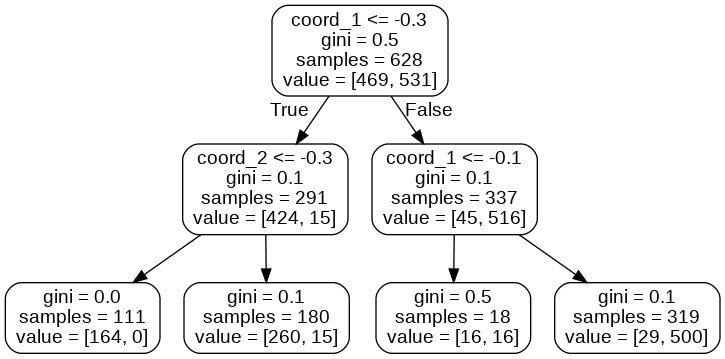

In [ ]:
from google.colab.patches import cv2_imshow
import cv2  
img = cv2.imread("/content/tree.png") 
  

cv2_imshow(img) 
  

